In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("stoke_cleaned_data.csv")

In [3]:
df

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,new_bmi,new_avg_glucose,age_wise
0,0,Male,3.0,no,no,No,children,Rural,never smoked,no,18.0,95.120,children
1,1,Male,58.0,yes,no,Yes,Private,Urban,never smoked,no,39.2,87.960,middle_age
2,2,Female,8.0,no,no,No,Private,Urban,never smoked,no,17.6,110.890,children
3,3,Female,70.0,no,no,Yes,Private,Rural,formerly smoked,no,35.9,69.040,senior_citizens
4,4,Male,14.0,no,no,No,Never_worked,Rural,never smoked,no,19.1,161.280,children
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,43395,Female,10.0,no,no,No,children,Urban,never smoked,no,20.4,58.640,children
43396,43396,Female,56.0,no,no,Yes,Govt_job,Urban,formerly smoked,no,46.4,163.865,middle_age
43397,43397,Female,82.0,yes,no,Yes,Private,Urban,formerly smoked,no,28.9,91.940,super_senior_citizens
43398,43398,Male,40.0,no,no,Yes,Private,Urban,never smoked,no,33.2,99.160,young


In [48]:
pd.crosstab(df["gender"],df["stroke"],margins=True)

stroke,no,yes,All
gender,,,
Female,25234,431,25665
Male,17372,352,17724
Other,11,0,11
All,42617,783,43400


* from the above cross tab female have highly stoke rate when compared to the male 

In [8]:
pd.crosstab(df["hypertension"],df["stroke"],margins=True)

stroke,no,yes,All
hypertension,,,
no,38756,583,39339
yes,3861,200,4061
All,42617,783,43400


* from this hypertension has no effected on the stroke

In [5]:
pd.crosstab(df["heart_disease"],df["stroke"],margins = True)

stroke,no,yes,All
heart_disease,,,
no,40732,606,41338
yes,1885,177,2062
All,42617,783,43400


* from this also heart disease is not impacted on the stroke

In [49]:
pd.crosstab(df["age_wise"],df["stroke"],margins=True)

stroke,no,yes,All
age_wise,,,
children,9013,2,9015
middle_age,12953,179,13132
senior_citizens,9122,500,9622
super_senior_citizens,810,79,889
young,10719,23,10742
All,42617,783,43400


**from the above cross tab the most of the stoke is impacted on the senior_citizens


In [87]:
pd.crosstab(df["smoking_status"],df["stroke"],margins = True)

stroke,no,yes,All
smoking_status,,,
formerly smoked,7272,221,7493
never smoked,28916,429,29345
smokes,6429,133,6562
All,42617,783,43400


* from the above cross tab the most of the stoke is impacted never  smoked more



In [30]:
df.groupby('gender')["stroke"].count()

gender
Female    25665
Male      17724
Other        11
Name: stroke, dtype: int64

* from the this we have seen that the female having the more count of the heart stroke 

* from the above cross tab the most of the stoke is impacted never smoked

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

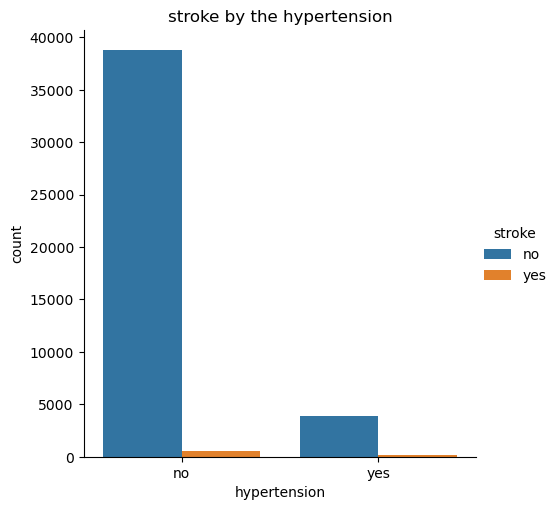

In [24]:
sns.catplot(x="hypertension",data=df,kind ="count",hue = "stroke")
plt.title("stroke by the hypertension")
plt.show()

C:\Users\lingi\AppData\Local\Temp\ipykernel_15972\1397750879.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.catplot(x="age_wise",data=df,y="new_avg_glucose",hue="stroke",kind="bar",color="green")


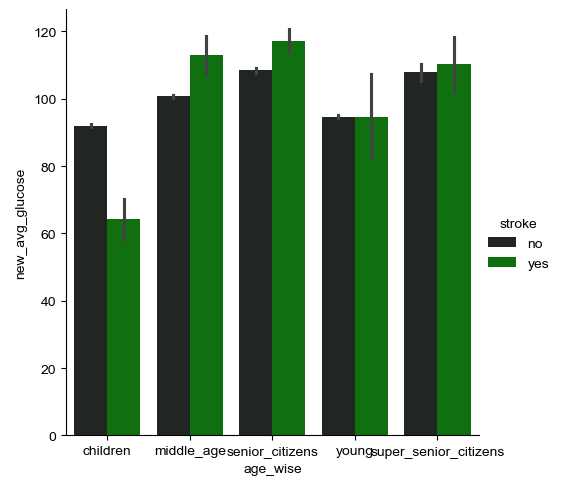

In [24]:
sns.catplot(x="age_wise",data=df,y="new_avg_glucose",hue="stroke",kind="bar",color="green")
sns.set_style("whitegrid")

plt.show()

from the above figure senior citizens and the super senior citizens are more effected from the stroke and the children are less effected in thye given data set

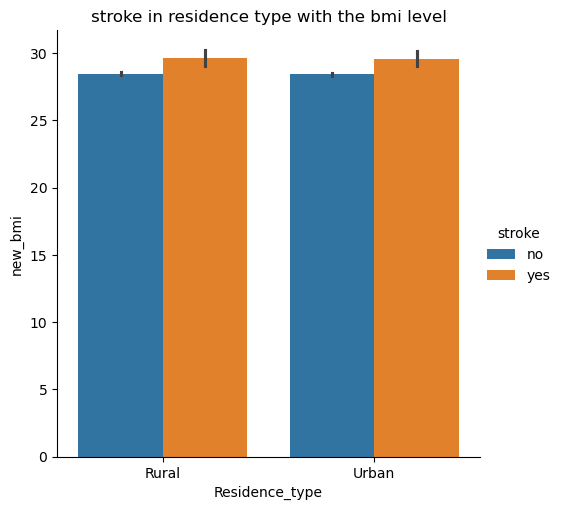

In [23]:
sns.catplot(x="Residence_type",y="new_bmi",hue="stroke",kind= "bar",data=df)
plt.title("stroke in residence type with the bmi level")
plt.show()

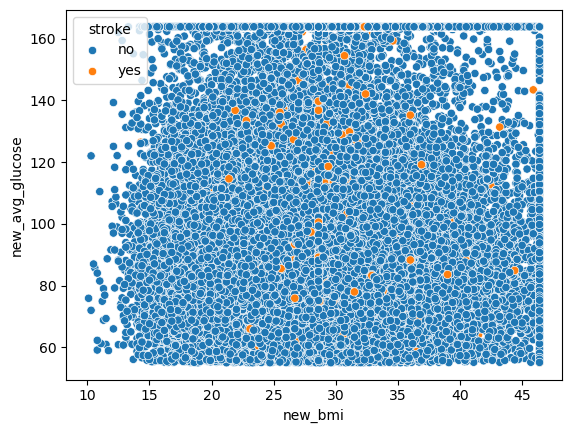

In [78]:
sns.scatterplot(x= df["new_bmi"],y=df["new_avg_glucose"],hue=df["stroke"])
plt.show()

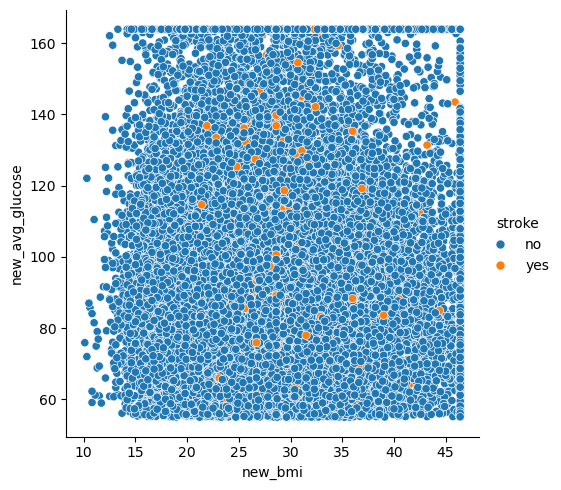

In [80]:
sns.relplot(x=df["new_bmi"],y=df["new_avg_glucose"],hue=df["stroke"])
plt.show()

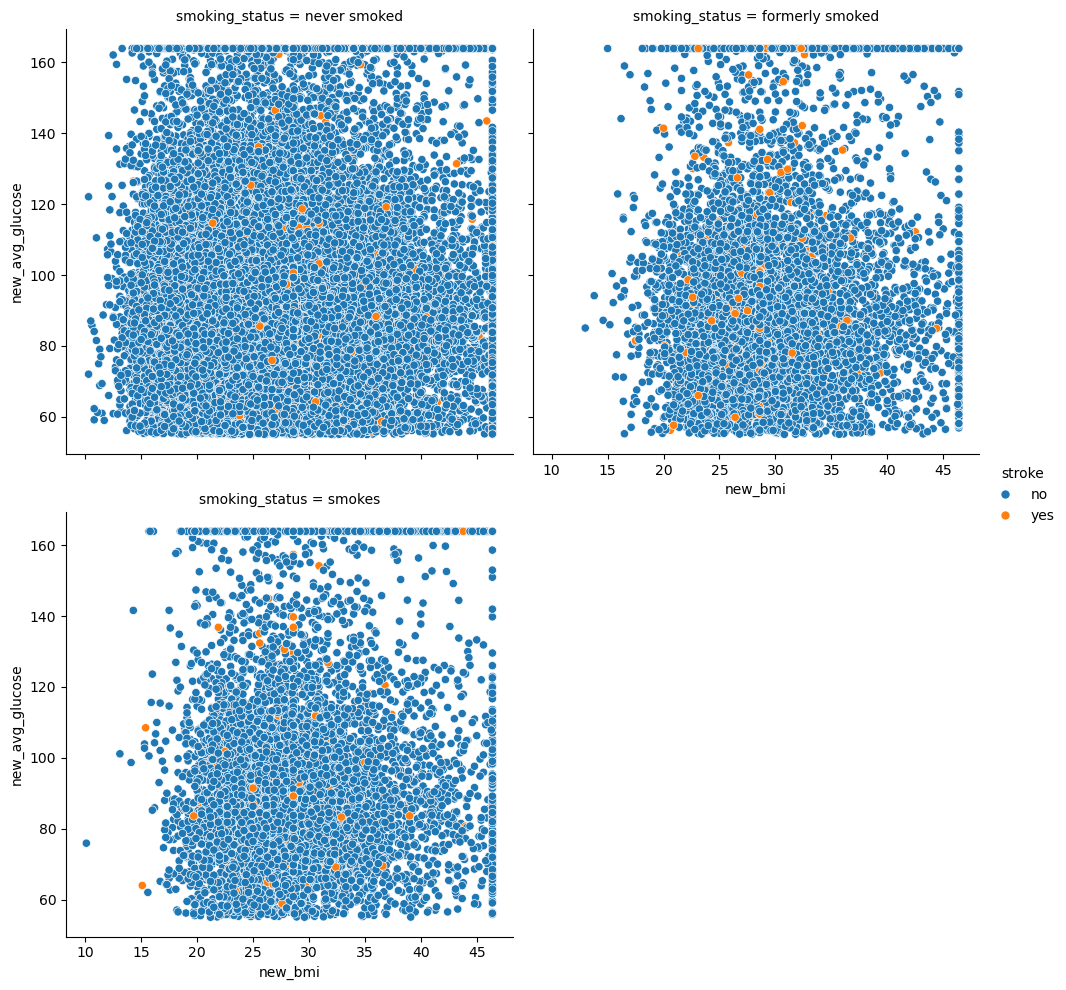

In [86]:
sns.relplot(x=df["new_bmi"],y=df["new_avg_glucose"],col=df["smoking_status"],col_wrap=2,hue=df["stroke"])
plt.show()

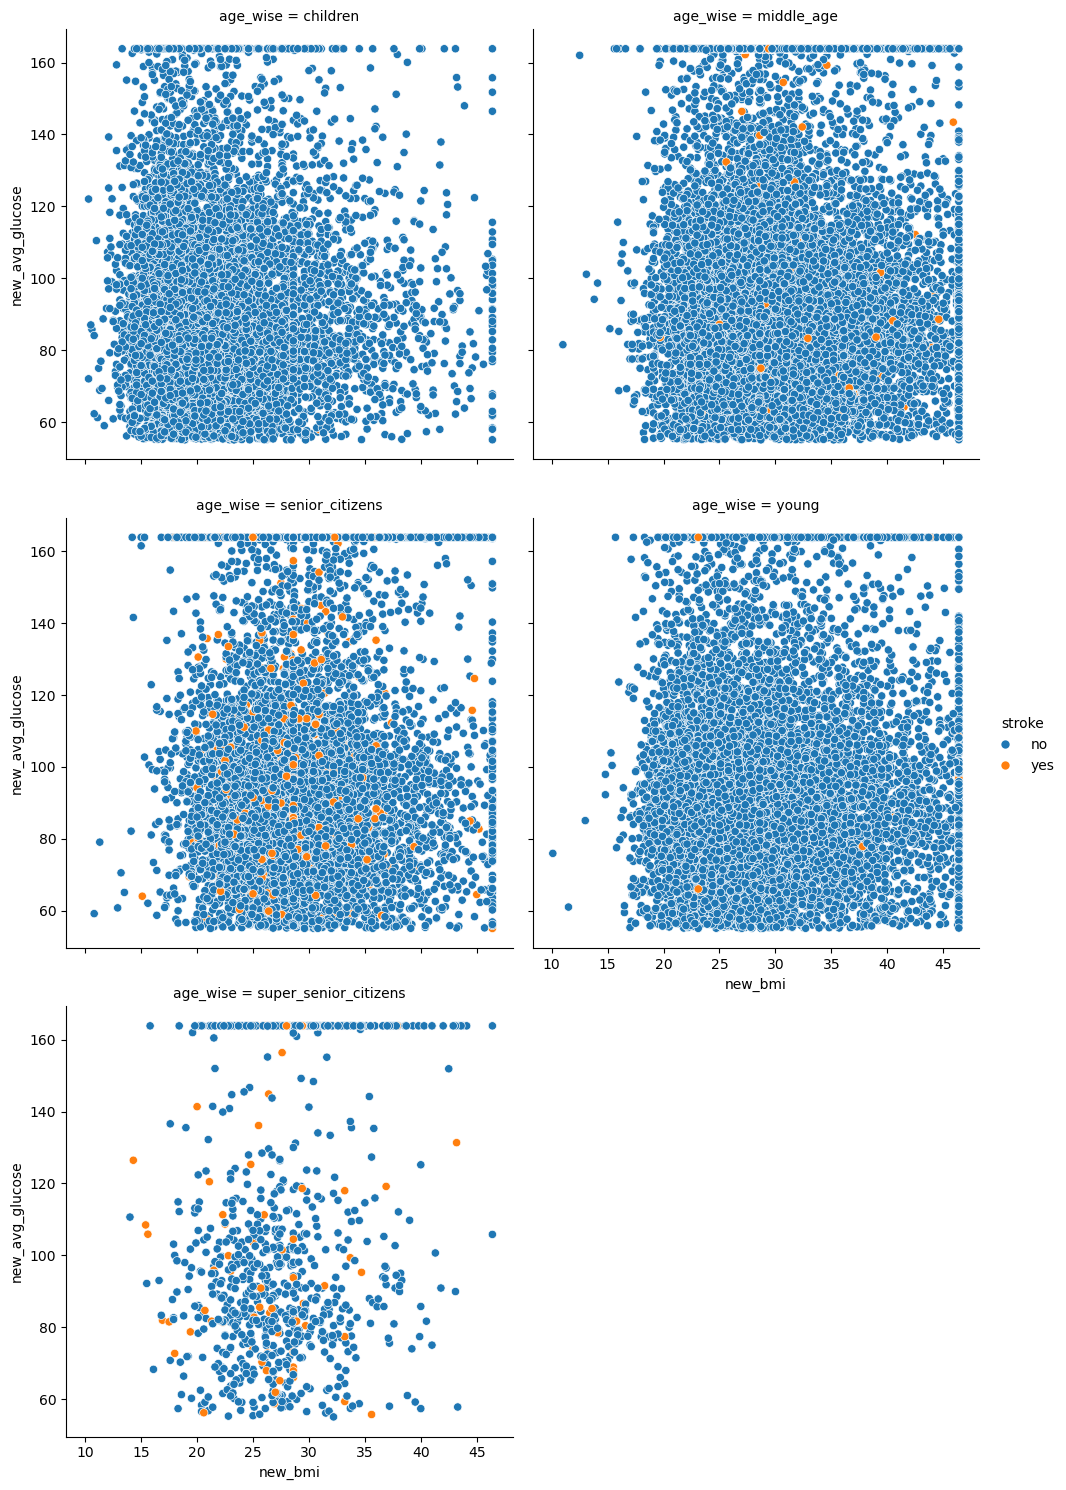

In [25]:
sns.relplot(x=df["new_bmi"],y=df["new_avg_glucose"],col=df["age_wise"],col_wrap=2,hue=df["stroke"])
plt.show()

* here the senior citizens and the super senior citizens have the more stroke problem

In [88]:
df.groupby("stroke")["new_avg_glucose"].mean()

stroke
no      99.112819
yes    114.752663
Name: new_avg_glucose, dtype: float64

In [89]:
df.groupby("stroke")["new_bmi"].mean()

stroke
no     28.442768
yes    29.589917
Name: new_bmi, dtype: float64

*from this i have observed with the average of the bmi with  the 29.589917 above  had the more impact on the stroke

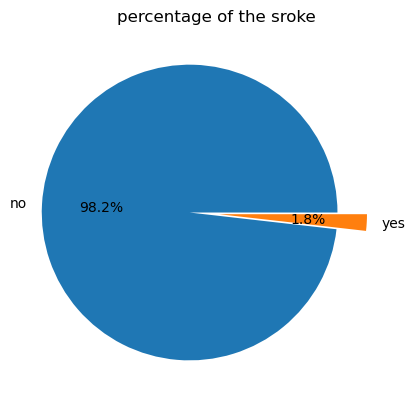

In [16]:
plt.pie(x=df["stroke"].value_counts(),
       labels = df["stroke"].value_counts().index.tolist(),
        explode = [0.2,0],autopct = "%0.1f%%")
plt.title("percentage of the sroke ")
plt.show()

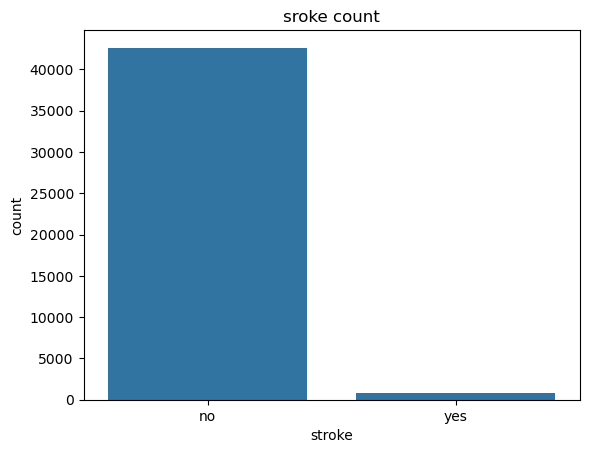

In [22]:
sns.countplot(x="stroke",data=df)
plt.title("sroke count")
plt.show()

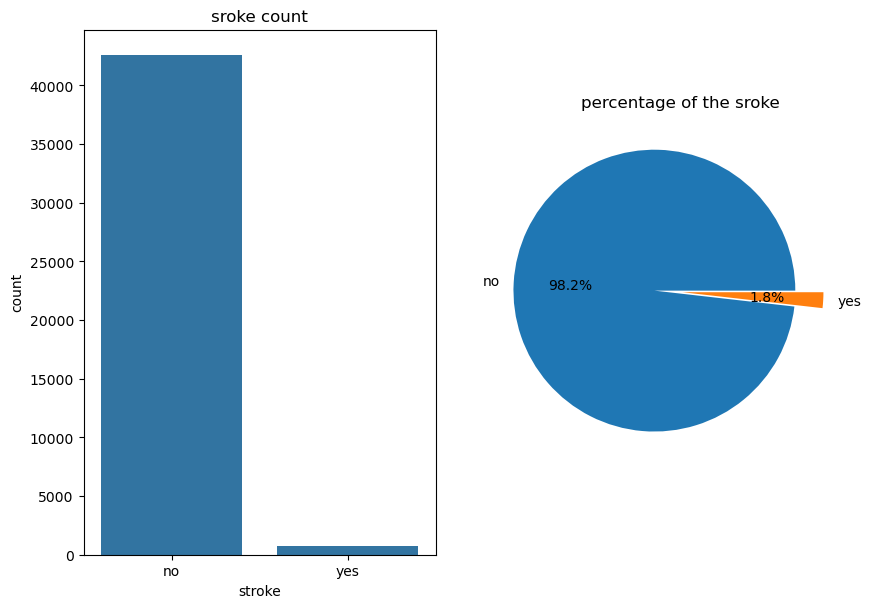

In [23]:
#figure size defined
plt.figure(figsize=(10,15))
#creating count plot in first cell
plt.subplot(2,2,1)
sns.countplot(x="stroke",data=df)
plt.title("sroke count")
#creating pie plot in secound cell
plt.subplot(2,2,2)
plt.pie(x=df["stroke"].value_counts(),
       labels = df["stroke"].value_counts().index.tolist(),
        explode = [0.2,0],autopct = "%0.1f%%")
plt.title("percentage of the sroke ")
plt.show()
